In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Control Display of seaborn data
pd.options.display.max_columns = 50
sns.set(style = "darkgrid", rc = {"axes.facecolor":"#CAF1DE"})


In [2]:
# Loading the dataset
df = pd.read_csv("bse_dataset.csv")
df

,Timestamp,What is your gender?,Age,What is your emotion?,Year of birth,What is your CGPA?,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?
0,05/07/2023 09:38:39,Male,21,Content,2002,4.22,No,No,Yes,Yes,Yes
1,05/07/2023 09:38:57,Marabou stock,45,Weird,2100,8.9,Yes,Yes,Yes,Yes,No
2,05/07/2023 09:39:09,Female,20,Happy,2002,3.98,No,No,Yes,Yes,No
3,05/07/2023 09:39:12,Male,21,Happy,2003,4.37,No,No,No,No,Nope
4,05/07/2023 09:39:14,Female,21,Happy,2002,3.63,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
92,05/07/2023 09:53:56,Female,68,Sad,1953,4.8,No,Yes,Yes,Yes,Yes
93,05/07/2023 09:54:13,Male,29,Hopeful,1994,I don't know yet,"Sure, multiple girlfriends",No,No,No,No
94,05/07/2023 09:54:28,Male,22,Fighting poverty,2001,3.12,Girl friends are thieves,Yes,Yes,No,No
95,05/07/2023 09:54:36,Male,23,good and bad,2000,3.5,Namiiro Zahara Bidin,No,No,No,No


In [3]:
# Data Analysis Workflow
# Understanding of dataset preparation
# Data cleaning - data cleaning, wrong data, wrong format, format null values, duplicate values
# Checking shape of data 
df.shape

(97, 11)

In [4]:
# Checking column names
df.columns

Index(['Timestamp', 'What is your gender?', 'Age', 'What is your emotion?',
       'Year of birth', 'What is your CGPA?',
       'Do you have a Girl Friend or BOY Friend', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you have seek any specialist for a treatment? '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Timestamp                                           97 non-null     object
 1   What is your gender?                                97 non-null     object
 2   Age                                                 97 non-null     int64 
 3   What is your emotion?                               96 non-null     object
 4   Year of birth                                       97 non-null     object
 5   What is your CGPA?                                  97 non-null     object
 6   Do you have a Girl Friend or BOY Friend             97 non-null     object
 7   Do you have Depression?                             97 non-null     object
 8   Do you have Anxiety?                                97 non-null     object
 9   Do you have 

In [6]:
df.isnull().sum().sort_values(ascending=False)

What is your emotion?                                 1
Timestamp                                             0
What is your gender?                                  0
Age                                                   0
Year of birth                                         0
What is your CGPA?                                    0
Do you have a Girl Friend or BOY Friend               0
Do you have Depression?                               0
Do you have Anxiety?                                  0
Do you have Panic attack?                             0
Did you have seek any specialist for a treatment?     0
dtype: int64

In [7]:
df1 = pd.read_csv('bse_dataset2.csv')
# Check null values
for i in df1.columns:
    if df1[i].isnull().any():
        print(i, "---", df1[i].isnull().sum()*100/df1.shape[0], "%")

Age --- 1.9607843137254901 %
What is your emotion? --- 0.9803921568627451 %


<Axes: >

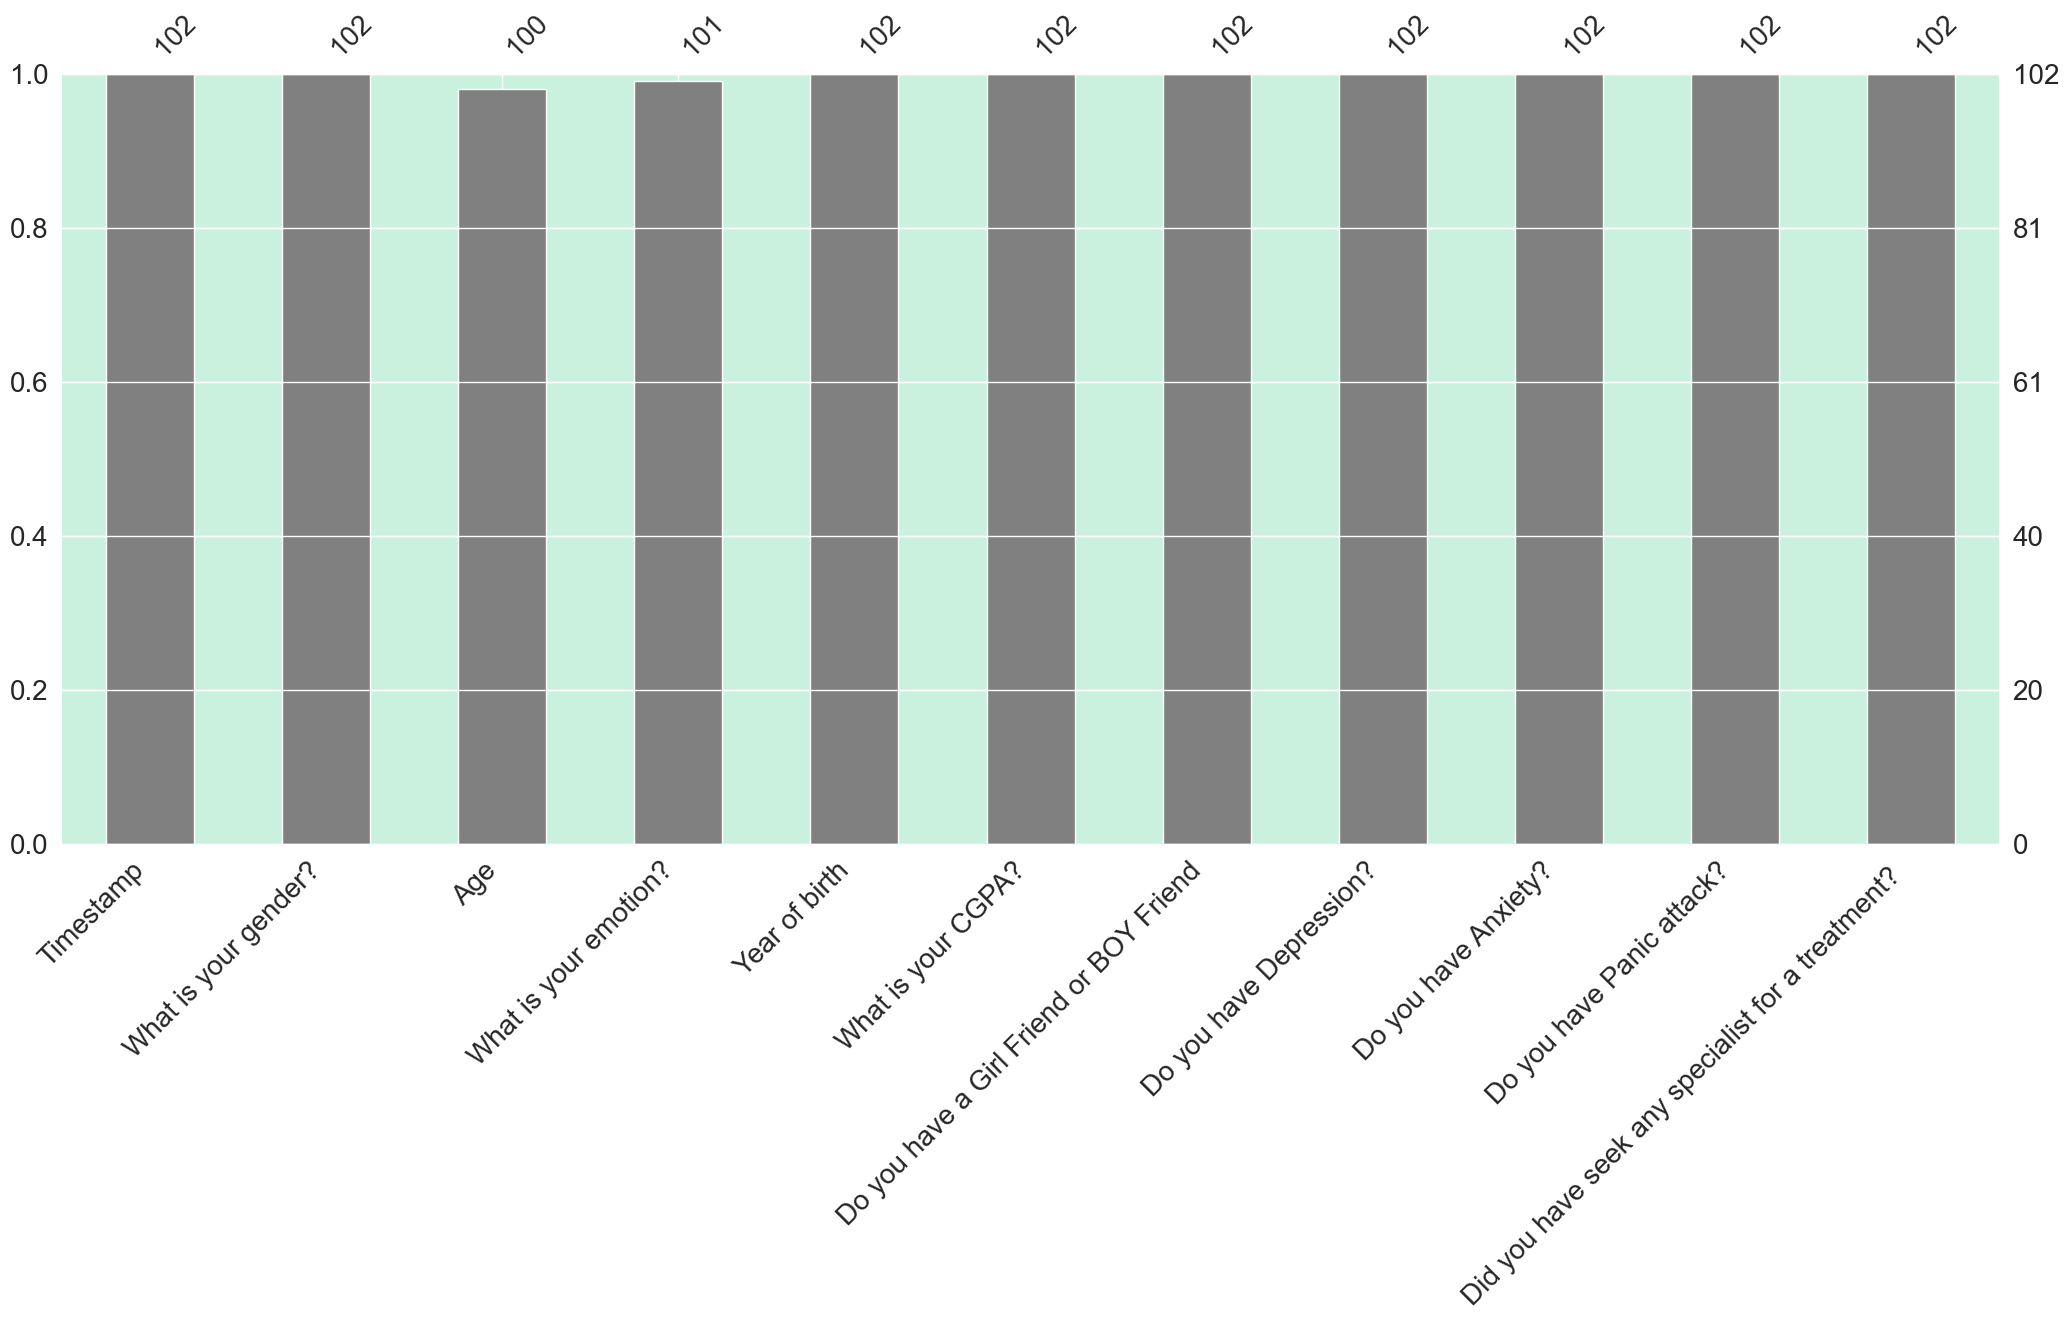

In [9]:
# Checking null values in figure
import missingno as msno
msno.bar(df1, color = "gray", fontsize = 20)

In [10]:
# checking for duplicates
df1.duplicated().sum()

0

In [16]:
# Describe() statistical details about the data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,22.95,6.213987,19.0,21.0,21.0,22.25,68.0


In [17]:
df1.describe(include='object').T

,count,unique,top,freq
Timestamp,102,95,05/07/2023 09:40:10,2
What is your gender?,102,10,Male,43
What is your emotion?,101,52,Happy,16
Year of birth,102,19,2002,40
What is your CGPA?,102,63,4,7
Do you have a Girl Friend or BOY Friend,102,14,No,39
Do you have Depression?,102,13,No,49
Do you have Anxiety?,102,18,No,40
Do you have Panic attack?,102,13,No,47
Did you have seek any specialist for a treatment?,102,9,No,48


In [21]:
# Check for unique values in dataframe
for i in df1.columns:
    print(i, "----", df1[i].unique(), "******", df1[i].unique())

Timestamp ---- ['05/07/2023 09:38:39' '05/07/2023 09:38:57' '05/07/2023 09:39:09'
 '05/07/2023 09:39:12' '05/07/2023 09:39:14' '05/07/2023 09:39:20'
 '05/07/2023 09:39:21' '05/07/2023 09:39:23' '05/07/2023 09:39:26'
 '05/07/2023 09:39:27' '05/07/2023 09:39:28' '05/07/2023 09:39:33'
 '05/07/2023 09:39:38' '05/07/2023 09:39:40' '05/07/2023 09:39:45'
 '05/07/2023 09:39:46' '05/07/2023 09:39:47' '05/07/2023 09:39:49'
 '05/07/2023 09:39:50' '05/07/2023 09:39:54' '05/07/2023 09:39:56'
 '05/07/2023 09:40:00' '05/07/2023 09:40:01' '05/07/2023 09:40:02'
 '05/07/2023 09:40:08' '05/07/2023 09:40:10' '05/07/2023 09:40:12'
 '05/07/2023 09:40:13' '05/07/2023 09:40:16' '05/07/2023 09:40:25'
 '05/07/2023 09:40:26' '05/07/2023 09:40:27' '05/07/2023 09:40:33'
 '05/07/2023 09:40:34' '05/07/2023 09:40:40' '05/07/2023 09:40:42'
 '05/07/2023 09:40:46' '05/07/2023 09:40:47' '05/07/2023 09:40:54'
 '05/07/2023 09:40:59' '05/07/2023 09:41:00' '05/07/2023 09:41:01'
 '05/07/2023 09:41:05' '05/07/2023 09:41:06' '0